In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {}
f = open('run_quad_ensemble-6.dat','r')
for i in range(3):
    f.readline()
cnames = f.readline().strip().split(', ')
for ci in cnames:
    data[ci] = []
for l in f:
    ls = l.strip().split(', ')
    lf = [float(lsi) for lsi in ls]
    for ci, fi in zip(cnames, lf):
        data[ci].append(fi)
f.close()
for ci in cnames:
    data[ci] = np.array(data[ci])

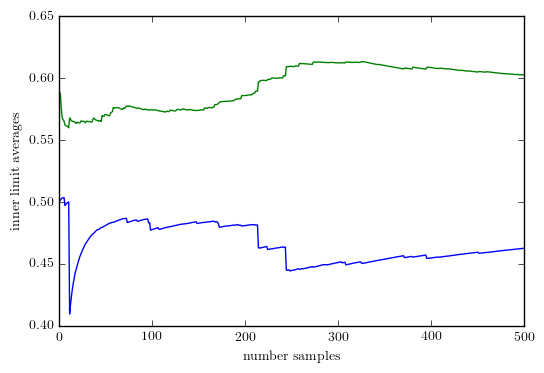

In [4]:
fig, ax = plt.subplots()
ax.plot(data['number samples'], data['inner min ave'], color='blue')
ax.plot(data['number samples'], data['inner max ave'], color='green')
ax.set_xlabel('number samples')
ax.set_ylabel('inner limit averages')

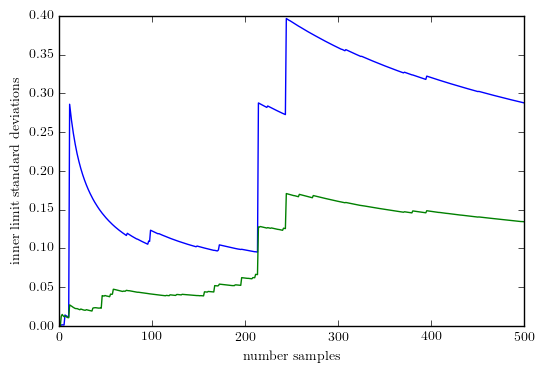

In [5]:
fig, ax = plt.subplots()
ax.plot(data['number samples'], data['inner min std'], color='blue')
ax.plot(data['number samples'], data['inner max std'], color='green')
ax.set_xlabel('number samples')
ax.set_ylabel('inner limit standard deviations')